In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import time
import sys
import mat73
import os
import re
from scipy import stats
import shutil

# FOOOF objects and functions
from fooof import FOOOFGroup
from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum

from fooof.plts.annotate import plot_annotated_model
# RBL function
from  plt_save_aperiodic_overtime import  plt_save_aperiodic_overtime

In [3]:
nk_dir       = '/Volumes/DBS Pain 3/nk_device_data/processed/fooof_specs (30s_prior_to_survey)/'

proc_dir     = '/Users/Leriche/pia_server/datastore_spirit/human/nk_device_data/ephy_analysis/spectra/'
proc_subdir  = 'fooofed'

#sense_dict   = pd.read_excel(rcs_dir + 'rcs_sensing_channels_per_hemisphere.xlsx')

In [4]:
pts = ['RCS02', 'RCS04', 'RCS05', 'RCS06', 'RCS07']
i = 1

In [5]:
raw_dir = nk_dir + pts[i] + '/'
raw_dir

'/Volumes/DBS Pain 3/nk_device_data/processed/fooof_specs (30s_prior_to_survey)/RCS04/'

In [22]:
print(pts[i])
tmp_labs = [re.split(r'(\d+)', ch_lab[4:]) for ch_lab in np.load(raw_dir + 'ch_labs.npy')]
ch_names = [ch_lab[0].replace(" ", "") + ' ' + ch_lab[1] +'-' + ch_lab[3] for ch_lab in tmp_labs]
print(ch_names)

raw_pwrspectra = np.load(raw_dir + 'specs.npy')

print(np.shape(spectra)) # spectra look to dimensionally trial by ch by freq 

fft_bins_inHz = np.load(raw_dir + 'freqs.npy')
print(np.shape(freqs))

RCS04
['LACC 5-3', 'RACC 5-3', 'LACC 5-4', 'RACC 5-4']
(142, 4, 298)
(298,)


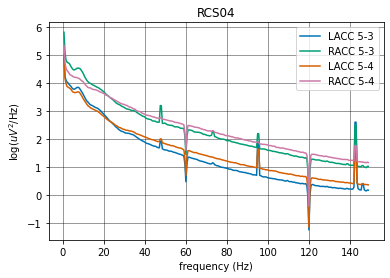

In [25]:
#### sanity check: importing from Jeremy's NK TD -> FFT processing
plt.style.use('seaborn-colorblind')
fig = plt.figure()
fig.patch.set_facecolor('white')    # nescessary so background of figure is white and NOT transparent
plt.title(pts[i])
for i_chan in range(len(ch_names)): # loop through channels

    plt.plot(fft_bins_inHz, np.log10(np.mean(raw_pwrspectra[:, i_chan, :], 0)))


   # plt.ylim([-11,-1])

    plt.xlabel('frequency (Hz)')
    plt.ylabel('log($uV^{2}$/Hz)')

    plt.grid(visible = True, color = 'k', alpha = .5, linestyle = '-')
   # plt.savefig(psd_results + ch_names[i_chan], bbox_inches='tight', dpi = 100)
plt.legend(ch_names)
plt.show()